In [2]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
from sklearn.inspection import PartialDependenceDisplay
# 为了正常显示中文
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['KaiTi', 'SimHei', 'FangSong']  # 汉字字体,优先使用楷体，如果找不到楷体，则使用黑体
mpl.rcParams['font.size'] = 12  # 字体大小
plt.rc('axes', unicode_minus=False)

In [3]:
datapath = './data/winequality_red.csv'
dataframe = pd.read_csv(datapath)
quality = dataframe.pop('quality')
X_train, X_test, y_train, y_test = train_test_split(dataframe, quality, test_size=0.2, random_state=0)

In [4]:
params = {'n_estimators': 500, # 弱分类器的个数
          'max_depth': 5,       # 弱分类器（CART回归树）的最大深度
          'min_samples_split': 5, # 分裂内部节点所需的最小样本数
          'learning_rate': 0.05,  # 学习率
          'loss': 'ls'}           # 损失函数：均方误差损失函数
GBDTreg = GradientBoostingRegressor(**params)
GBDTreg.fit(X_train, y_train)

C:\Users\fesia\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


GradientBoostingRegressor(learning_rate=0.05, loss='ls', max_depth=5,
                          min_samples_split=5, n_estimators=500)

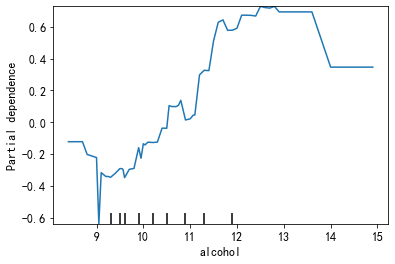

In [5]:
# fig, (ax1, ax2, ax3) = plt.subplots(3,1)
PartialDependenceDisplay.from_estimator(GBDTreg, X_train, [10])
# PartialDependenceDisplay.from_estimator(GBDTreg, X_train, [2], ax=ax2)
# PartialDependenceDisplay.from_estimator(GBDTreg, X_train, [4], ax=ax3)


C:\Users\fesia\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


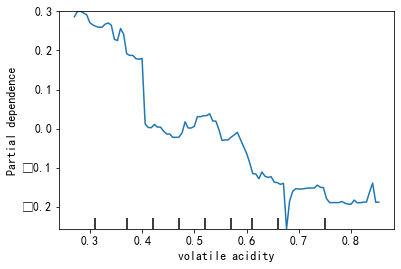

In [8]:
PartialDependenceDisplay.from_estimator(GBDTreg, X_train, [1])

C:\Users\fesia\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


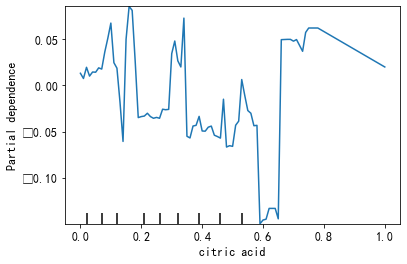

In [29]:
PartialDependenceDisplay.from_estimator(GBDTreg, X_train, [2])